In [11]:
# https://github.com/sdv-dev/CTGAN

import os
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from CTGan.ctgan import CTGAN
from Core.tSNE import tSNEPlots

print(os.getcwd())

d:\PhD2016_acer\01. Workspaces\fbEvasionMetrics\AdvFailureCurves


# Load Data

## <font color='red'> KYOTO </font>

In [2]:
strFileName =  r'../DATA/Kyoto2015DS.csv'
dfKyoto = pd.read_csv(strFileName, delimiter=',')

print(dfKyoto.shape)
print(dfKyoto.groupby('label').size())
#print(dfKyoto.head(5))

(60000, 14)
label
0    30000
1    30000
dtype: int64


### Select Negative Data

In [3]:
# Select rows where column 'column_name' equals a specific value
dfRealData = dfKyoto.loc[dfKyoto['label'] == 1]
dfRealData = dfRealData.drop('label', axis=1)
print(dfRealData.shape)

(30000, 13)


### Boxplot

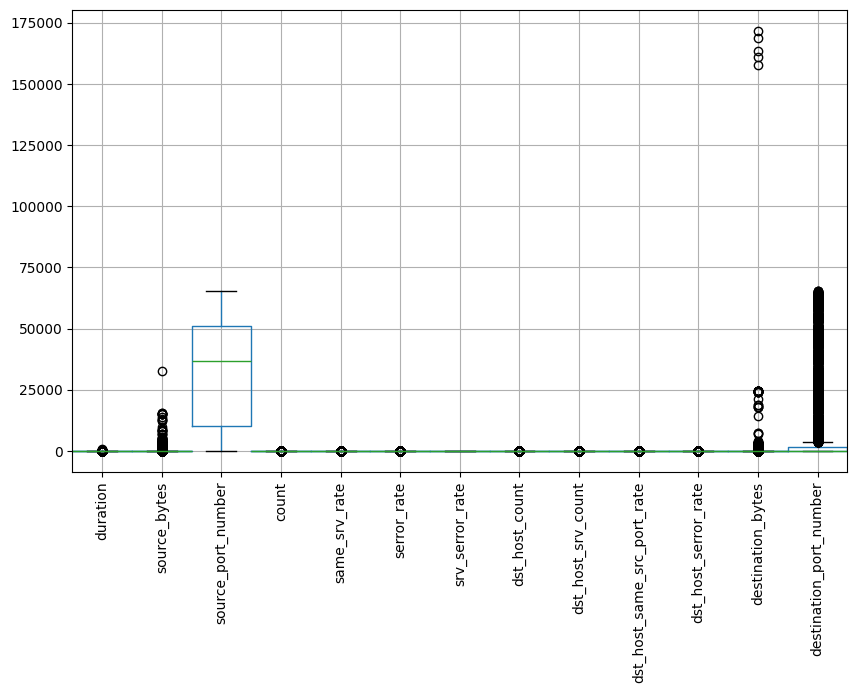

In [5]:
dfRealData.boxplot(figsize = (10, 6), widths = 1)
# Rotate x-axis labels
plt.xticks(rotation=90)
#plt.xlabel("X-axis Label", fontsize=14, fontweight='bold', fontfamily='Arial')
plt.show()

## <font color='red'>BETH</font>

# <font color='blue'>Generate Synthetic Data</font>

In [ ]:
ctgan = CTGAN(epochs=10)
ctgan.fit(dfRealData)

# Create synthetic data
nSample = 100
dfSynData = ctgan.sample(nSample)
print(dfSynData.shape)
print(dfSynData.head(5))

strSynFileName = '../DATA/Kyoto_Syn_' + str(nSample) + '.csv'
dfSynData.to_csv(strSynFileName, index=False)

(100, 13)
   duration  source_bytes  source_port_number  count  same_srv_rate  \
0  0.035333            -3               17490      0       0.001498   
1  7.615548           624               17742     11      -0.002888   
2  4.089853           -79               39385      0       0.000398   
3 -0.033615            30               28448      0       0.002642   
4  3.628567            21               31104      0      -0.000378   

   serror_rate  srv_serror_rate  dst_host_count  dst_host_srv_count  \
0    -0.000159         0.007650               0                  40   
1    -0.000532         0.000450              78                  16   
2    -0.000750         0.003240              13                   0   
3    -0.001454         0.002738               0                  14   
4    -0.002822        -0.001871               0                  -1   

   dst_host_same_src_port_rate  dst_host_serror_rate  destination_bytes  \
0                     0.000994              0.000337         

---
# <font color='green'>tSNE Plot</font>

In [12]:
dfReal_100 = dfRealData.sample(n=100, random_state=42)
dfReal_100['Label'] = 0
print(dfReal_100.shape)

strSynFileName = '../DATA/Kyoto_Syn_100.csv'
dfSyn_100 = pd.read_csv(strSynFileName, delimiter=',')
dfSyn_100['Label'] = 1
print(dfSyn_100.shape)

listDS = np.vstack([dfReal_100.to_numpy(), dfSyn_100.to_numpy()])
print(listDS.shape)

(100, 14)
(100, 14)
(200, 14)


Data for tSNE (200, 13)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 5203.701867


c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:

[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.457153
[t-SNE] KL divergence after 300 iterations: 0.140239


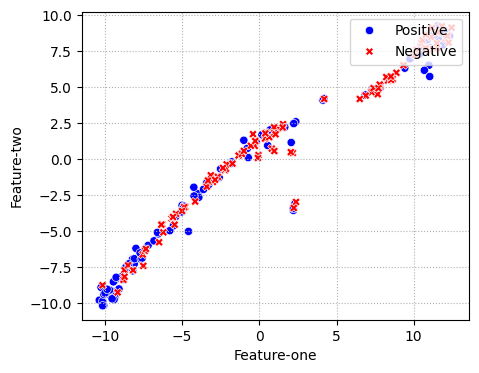

In [13]:
dfCols = ['Bin_'+str(i) for i in range(dfRealData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=None)